In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [2]:
raw_data = pd.read_csv('missrate_motivation.csv')
raw_data.columns = ['Benchmark', 'L1TLBMissRate', 'L2TLBMissRate', 'L1TLBMissRatio', 'L2TLBMissRatio']
raw_data

,Benchmark,L1TLBMissRate,L2TLBMissRate,L1TLBMissRatio,L2TLBMissRatio
0,mt,99.000,93.00,0.99000,0.9300
1,mm,73.590,65.30,0.73590,0.6530
2,km,57.000,73.42,0.57000,0.7342
3,st,72.000,89.93,0.72000,0.8993
4,pr,45.780,65.25,0.45780,0.6525
5,spmv,95.382,78.12,0.95382,0.7812
6,flw,26.000,2.67,0.26000,0.0267
7,fir,0.690,32.00,0.00690,0.3200
8,sc,0.079,4.09,0.00079,0.0409
9,bs,4.030,18.92,0.04030,0.1892


In [3]:
stacked_data = raw_data


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['L1TLBMissRatio', 'L2TLBMissRatio'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'MissRate']
stacked_data = stacked_data.reset_index()
stacked_data


,index,Benchmark,Configuration,MissRate
0,9,BS,L1TLBMissRatio,0.04030
1,19,BS,L2TLBMissRatio,0.18920
2,17,FIR,L2TLBMissRatio,0.32000
3,7,FIR,L1TLBMissRatio,0.00690
4,16,FLW,L2TLBMissRatio,0.02670
5,6,FLW,L1TLBMissRatio,0.26000
6,2,KM,L1TLBMissRatio,0.57000
7,12,KM,L2TLBMissRatio,0.73420
8,11,MM,L2TLBMissRatio,0.65300
9,1,MM,L1TLBMissRatio,0.73590


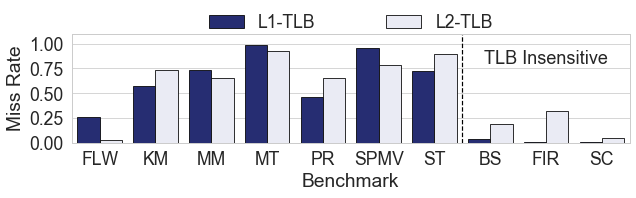

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='MissRate', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels=['L1-TLB', 'L2-TLB']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=4,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=2)
ax.set_ylim(0, 1.1)
ax.set_yticks([0, .25, .50, .75, 1])
ax.set_ylabel('Miss Rate')
# ax.text(1.25, 1.6, 2.29, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(5.25, 1.6, 8.33, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(6.25, 1.6, 10.67, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(9.25, 1.6, 2.88, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))

ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 0.85, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)


plt.savefig('missrate.pdf', bbox_inches='tight')
plt.savefig('missrate.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()